In [1]:
# Load required Libraries
import numpy as np, pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
from sklearn.metrics import r2_score # To get the rsq score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from sklearn.utils import check_arrays  # For MAPE calculation
from sklearn.preprocessing import PolynomialFeatures #For Polynomial LM
from sklearn.model_selection import cross_val_score #K-fold CV
from sklearn.metrics import mean_squared_error #MSE
from sklearn.feature_selection import f_regression #for ANNOVA
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA # PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format  # to suppress scientific notation

# ------------------------Read The Cleaned data----------------------

In [2]:
df = pd.read_csv("D:/Notes/Matt 891/Matt_imdb project/IMDBforR.csv")
Test_df_final = pd.read_csv("D:/Notes/Matt 891/Matt_imdb project/Test_4movies.csv")

# ---------------------Create A Baseline Linear Model------------------------

In [170]:
# Function to calculate MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [171]:
# Get a Overview of the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 14 columns):
Unnamed: 0                    1023 non-null int64
title                         1023 non-null object
year                          1023 non-null int64
certi                         1023 non-null object
time                          1023 non-null object
release_date                  1023 non-null object
rating                        1023 non-null float64
metascore                     734 non-null float64
budget                        1023 non-null int64
Opening_Weekend_USA           1023 non-null int64
Gross_USA                     1023 non-null int64
Cumulative_Worldwide_Gross    1023 non-null int64
Runtime                       1010 non-null float64
Release_Month                 1023 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 112.0+ KB
None
       Unnamed: 0    year  rating  metascore       budget  \
count     1023.00 1023.00 1023.00     734.00      1023

In [172]:
df["year"] = df["year"].astype('category',copy=False)
df["Release_Month"] = df["Release_Month"].astype('category',copy=False)

# Checking for null values and filling it with the mean of the colum for only those which 
        # we are going to check as independent variables 
df.isnull().any()
df['metascore'].fillna((df['metascore'].mean()), inplace=True)
df['Runtime'].fillna((df['Runtime'].mean()), inplace=True)

# Selecting the colums for analysis and Converting categorical variable to dummy 

df_model = df[['certi', 'rating', 'metascore', 'budget', 'Runtime','Gross_USA','Release_Month']]
df_model = pd.get_dummies(df_model)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 20 columns):
rating              1023 non-null float64
metascore           1023 non-null float64
budget              1023 non-null int64
Runtime             1023 non-null float64
Gross_USA           1023 non-null int64
certi_PG            1023 non-null uint8
certi_PG-13         1023 non-null uint8
certi_R             1023 non-null uint8
Release_Month_1     1023 non-null uint8
Release_Month_2     1023 non-null uint8
Release_Month_3     1023 non-null uint8
Release_Month_4     1023 non-null uint8
Release_Month_5     1023 non-null uint8
Release_Month_6     1023 non-null uint8
Release_Month_7     1023 non-null uint8
Release_Month_8     1023 non-null uint8
Release_Month_9     1023 non-null uint8
Release_Month_10    1023 non-null uint8
Release_Month_11    1023 non-null uint8
Release_Month_12    1023 non-null uint8
dtypes: float64(3), int64(2), uint8(15)
memory usage: 55.1 KB


In [173]:
#Setting Dependent and independent Variables

X = df_model[['budget', 'Runtime','certi_PG','certi_PG-13','certi_R','Release_Month_1','Release_Month_2',
              'Release_Month_3','Release_Month_4','Release_Month_5','Release_Month_6','Release_Month_7','Release_Month_8',
             'Release_Month_9','Release_Month_10','Release_Month_11','Release_Month_12']].values
y = df_model[["Gross_USA"]].values


# Splitting data in 80-20 proportion.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [174]:
# Linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
# Y-intercept
lr.intercept_

array([-78372746.35451028])

In [176]:
# Predict and check on validation set

y_pred = lr.predict(X_test)
mean_absolute_percentage_error(y_test,y_pred)

2360.1516428619766

In [177]:
# Rsq score

r2_score(y_test,y_pred)

0.5423522028883306

In [178]:
# Predict for our test cases.

y_pred_f = lr.predict(Test_df_final)
y_pred_f

array([[2.01518458e+08],
       [1.34814087e+08],
       [3.47470170e+07],
       [1.88495126e+08]])

## Linear assumptions

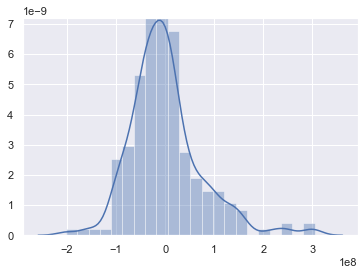

In [179]:
# Checking assumptions of linear regression

residuals = y_test - y_pred

plt.figure()
sns.distplot(residuals)
plt.show()

# ---------------Principal component analysis-------------------

In [139]:
#Select number of Principal components 

pc = PCA(n_components=3,random_state=1)

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Apply PCA
X_train_pc = pc.fit_transform(X_train,y_train)
X_test_pc = pc.transform(X_test)

In [141]:
lin = LinearRegression()
lin.fit(X_train_pc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
lin.score(X_test_pc,y_test)

0.5342795615269864

In [143]:
y_pred = lin.predict(X_test_pc)
mean_absolute_percentage_error(y_test,y_pred)


1476.2567944062541

In [144]:
r2_score(y_test,y_pred)

0.5342795615269864

In [145]:
# Predict for our test cases

y_pred_f = lin.predict(pc.transform(Test_df_final))
y_pred_f

array([[1.96571798e+08],
       [1.40331404e+08],
       [5.38600720e+07],
       [2.02171318e+08]])

# -------------------------- Polynomial regression----------------

In [146]:
#Select degree of polynomial

pf = PolynomialFeatures(2)

In [147]:
X_poly = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.2)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred = lr.predict(X_test)
mean_absolute_percentage_error(y_test,y_pred)

2859.4919609358567

In [149]:
r2_score(y_test,y_pred)

0.5459932509177894

In [152]:
# Predict for test cases

y_pred_f = lr.predict(pf.fit_transform(Test_df_final))
y_pred_f

array([[1.98883952e+08],
       [9.55572663e+07],
       [3.42770869e+07],
       [1.83330602e+08]])

# --------------- Rough Work--------------

In [9]:
data = df[["budget","Gross_USA"]]
data

,budget,Gross_USA
0,237000000,760507625
1,300000000,309420425
2,250000000,448139099
3,250000000,73078100
4,258000000,336530303
...,...,...
1018,40000000,69030436
1019,95000000,159227644
1020,175000000,77047065
1021,90000000,204417855


In [10]:
data['budget'] = np.log10(data['budget'])
data['Gross_USA'] = np.log10(data['Gross_USA'])

C:\Users\neilr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\neilr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


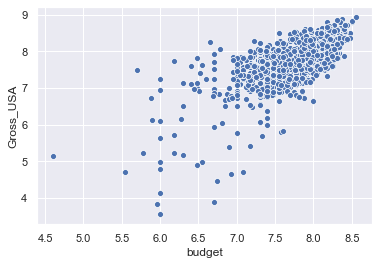

In [11]:
sns.scatterplot(x="budget", y="Gross_USA", data=data)

In [12]:
data.corr()

,budget,Gross_USA
budget,1.00,0.71
Gross_USA,0.71,1.00
